In [1]:
import os
import shutil
import tempfile
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
from sklearn.metrics import classification_report
import torch

In [2]:
train_dir = '../data/train'
val_dir = '../data/valid'
test_dir = '../data/test'
class_names = os.listdir(train_dir)
print(class_names)

['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BECKERS WHITE', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA', 'LARGE MARBLE', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW', 'PAINTED LADY', 'PAPER KITE', 'PEACOCK', 'PINE WHITE', 'PIPEVINE SWALLOW', 'POPINJAY', 'PURPLE HAIRSTREAK', 'PURPLISH COPPER', 'QUESTION MARK', 'RED ADMIRA

In [3]:
num_class = len(class_names)
train_image_files = [[os.path.join(train_dir, class_name, x)
               for x in os.listdir(os.path.join(train_dir, class_name))]
               for class_name in class_names]

valid_image_files = [[os.path.join(val_dir, class_name, x)
               for x in os.listdir(os.path.join(val_dir, class_name))]
               for class_name in class_names]

test_image_files = [[os.path.join(test_dir, class_name, x)
               for x in os.listdir(os.path.join(test_dir, class_name))]
               for class_name in class_names]

In [4]:
num_class

75

In [5]:
train_image_files

[['../data/train\\ADONIS\\01.jpg',
  '../data/train\\ADONIS\\02.jpg',
  '../data/train\\ADONIS\\03.jpg',
  '../data/train\\ADONIS\\04.jpg',
  '../data/train\\ADONIS\\05.jpg',
  '../data/train\\ADONIS\\06.jpg',
  '../data/train\\ADONIS\\07.jpg',
  '../data/train\\ADONIS\\08.jpg',
  '../data/train\\ADONIS\\09.jpg',
  '../data/train\\ADONIS\\10.jpg',
  '../data/train\\ADONIS\\100.jpg',
  '../data/train\\ADONIS\\101.jpg',
  '../data/train\\ADONIS\\102.jpg',
  '../data/train\\ADONIS\\103.jpg',
  '../data/train\\ADONIS\\104.jpg',
  '../data/train\\ADONIS\\105.jpg',
  '../data/train\\ADONIS\\106.jpg',
  '../data/train\\ADONIS\\107.jpg',
  '../data/train\\ADONIS\\108.jpg',
  '../data/train\\ADONIS\\109.jpg',
  '../data/train\\ADONIS\\11.jpg',
  '../data/train\\ADONIS\\110.jpg',
  '../data/train\\ADONIS\\111.jpg',
  '../data/train\\ADONIS\\112.jpg',
  '../data/train\\ADONIS\\113.jpg',
  '../data/train\\ADONIS\\114.jpg',
  '../data/train\\ADONIS\\115.jpg',
  '../data/train\\ADONIS\\116.jpg',
  '

In [6]:
def collect_images(image_files):
    image_file_list0 = []
    image_label_list0 = []
    for i, class_name in enumerate(class_names):
        image_file_list0.extend(image_files[i])
        image_label_list0.extend([i] * len(image_files[i]))
    image_file_list = []
    image_label_list = []
    for i, path in enumerate(image_file_list0):
        IMG0 = path.split('.')[-1]
        if IMG0 != 'svg' and IMG0 != 'gif':
            image_file_list += [path]
            image_label_list += [image_label_list0[i]]
    return image_file_list, image_label_list

In [7]:
train_file_list, train_label_list = collect_images(train_image_files)
valid_file_list, valid_label_list = collect_images(valid_image_files)
test_file_list, test_label_list = collect_images(test_image_files)

In [9]:
train_file_list

['../data/train\\ADONIS\\01.jpg',
 '../data/train\\ADONIS\\02.jpg',
 '../data/train\\ADONIS\\03.jpg',
 '../data/train\\ADONIS\\04.jpg',
 '../data/train\\ADONIS\\05.jpg',
 '../data/train\\ADONIS\\06.jpg',
 '../data/train\\ADONIS\\07.jpg',
 '../data/train\\ADONIS\\08.jpg',
 '../data/train\\ADONIS\\09.jpg',
 '../data/train\\ADONIS\\10.jpg',
 '../data/train\\ADONIS\\100.jpg',
 '../data/train\\ADONIS\\101.jpg',
 '../data/train\\ADONIS\\102.jpg',
 '../data/train\\ADONIS\\103.jpg',
 '../data/train\\ADONIS\\104.jpg',
 '../data/train\\ADONIS\\105.jpg',
 '../data/train\\ADONIS\\106.jpg',
 '../data/train\\ADONIS\\107.jpg',
 '../data/train\\ADONIS\\108.jpg',
 '../data/train\\ADONIS\\109.jpg',
 '../data/train\\ADONIS\\11.jpg',
 '../data/train\\ADONIS\\110.jpg',
 '../data/train\\ADONIS\\111.jpg',
 '../data/train\\ADONIS\\112.jpg',
 '../data/train\\ADONIS\\113.jpg',
 '../data/train\\ADONIS\\114.jpg',
 '../data/train\\ADONIS\\115.jpg',
 '../data/train\\ADONIS\\116.jpg',
 '../data/train\\ADONIS\\117.jp

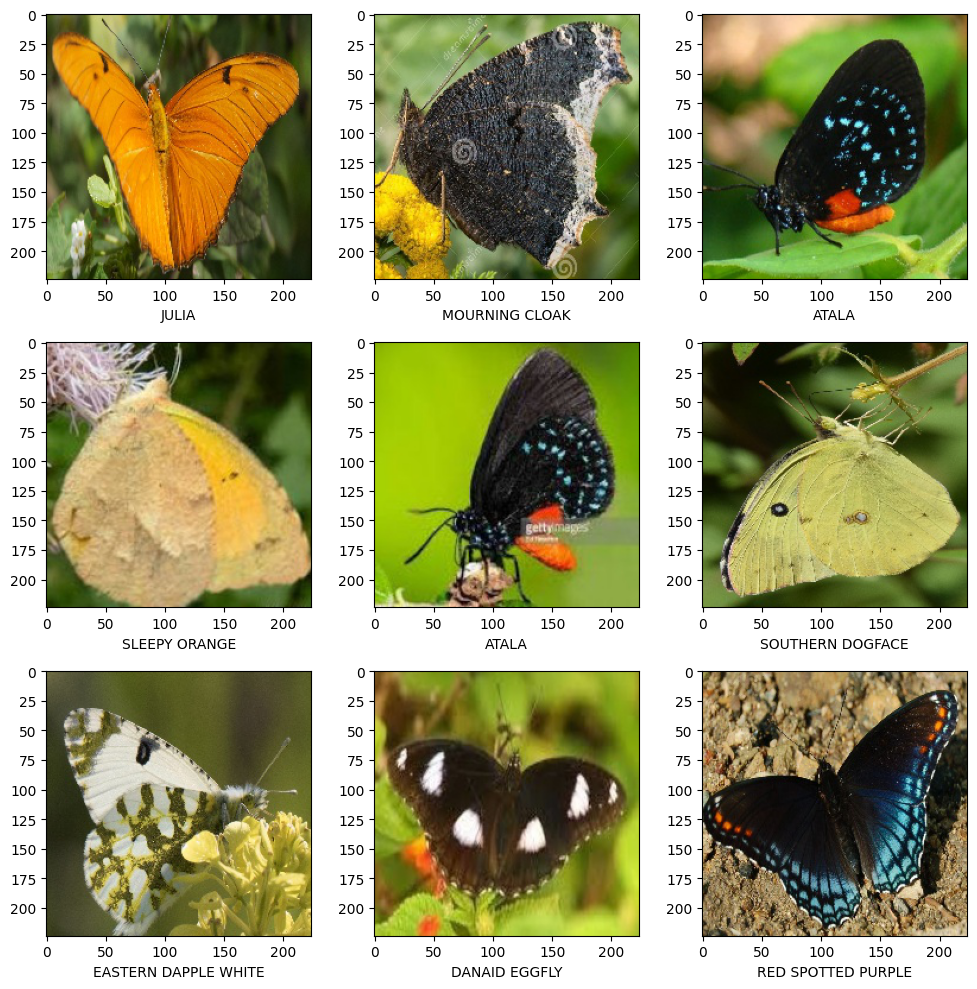

In [10]:
plt.subplots(3,3, figsize=(10,10))
for i,k in enumerate(np.random.randint(len(train_file_list), size=9)):
    im = Image.open(train_file_list[k])
    arr = np.array(im)
    plt.subplot(3,3, i+1)
    plt.xlabel(class_names[train_label_list[k]])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show()

In [11]:
trainX=np.array(train_file_list)
trainY=np.array(train_label_list)
valX=np.array(valid_file_list)
valY=np.array(valid_label_list)
testX=np.array(test_file_list)
testY=np.array(test_label_list)

### MORE BABOCHKI

In [15]:
# Importing necessary library
import Augmentor
import shutil

In [21]:
def augment_pics(source, amount):
    print("Processing:", source)
    # Passing the path of the image directory
    p = Augmentor.Pipeline(source)

    p.flip_left_right(0.8)
    p.rotate(0.3, 10, 10)
    p.sample(amount)

    file_names = os.listdir(source + "/output")

    for file_name in file_names:
        shutil.move(os.path.join(source + "/output", file_name), source)
    shutil.rmtree(source + "/output")

In [23]:
for folder in [os.path.join(train_dir, class_name)
               for class_name in class_names]:
    augment_pics(folder, 50)

Processing: ../data/train\ADONIS
Initialised with 126 image(s) found.
Output directory set to ../data/train\ADONIS\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E7B20>: 100%|██████████| 50/50 [00:00<00:00, 196.62 Samples/s]                  


Processing: ../data/train\AFRICAN GIANT SWALLOWTAIL
Initialised with 107 image(s) found.
Output directory set to ../data/train\AFRICAN GIANT SWALLOWTAIL\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4EE100>: 100%|██████████| 50/50 [00:00<00:00, 113.19 Samples/s]                  


Processing: ../data/train\AMERICAN SNOOT
Initialised with 105 image(s) found.
Output directory set to ../data/train\AMERICAN SNOOT\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4F3370>: 100%|██████████| 50/50 [00:00<00:00, 204.22 Samples/s]                  


Processing: ../data/train\AN 88
Initialised with 121 image(s) found.
Output directory set to ../data/train\AN 88\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4F36D0>: 100%|██████████| 50/50 [00:00<00:00, 209.00 Samples/s]                  


Processing: ../data/train\APPOLLO
Initialised with 128 image(s) found.
Output directory set to ../data/train\APPOLLO\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C467220>: 100%|██████████| 50/50 [00:00<00:00, 208.47 Samples/s]                  


Processing: ../data/train\ATALA
Initialised with 143 image(s) found.
Output directory set to ../data/train\ATALA\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4D9FA0>: 100%|██████████| 50/50 [00:00<00:00, 208.48 Samples/s]                  


Processing: ../data/train\BANDED ORANGE HELICONIAN
Initialised with 139 image(s) found.
Output directory set to ../data/train\BANDED ORANGE HELICONIAN\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4D99A0>: 100%|██████████| 50/50 [00:00<00:00, 221.10 Samples/s]                  


Processing: ../data/train\BANDED PEACOCK
Initialised with 119 image(s) found.
Output directory set to ../data/train\BANDED PEACOCK\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E5280>: 100%|██████████| 50/50 [00:00<00:00, 217.17 Samples/s]                  


Processing: ../data/train\BECKERS WHITE
Initialised with 116 image(s) found.
Output directory set to ../data/train\BECKERS WHITE\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E7160>: 100%|██████████| 50/50 [00:00<00:00, 213.82 Samples/s]                  


Processing: ../data/train\BLACK HAIRSTREAK
Initialised with 121 image(s) found.
Output directory set to ../data/train\BLACK HAIRSTREAK\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4C88E0>: 100%|██████████| 50/50 [00:00<00:00, 217.44 Samples/s]                  


Processing: ../data/train\BLUE MORPHO
Initialised with 107 image(s) found.
Output directory set to ../data/train\BLUE MORPHO\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1AE6C4D83A0>: 100%|██████████| 50/50 [00:00<00:00, 212.91 Samples/s]


Processing: ../data/train\BLUE SPOTTED CROW
Initialised with 123 image(s) found.
Output directory set to ../data/train\BLUE SPOTTED CROW\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4CE8B0>: 100%|██████████| 50/50 [00:00<00:00, 211.09 Samples/s]                  


Processing: ../data/train\BROWN SIPROETA
Initialised with 141 image(s) found.
Output directory set to ../data/train\BROWN SIPROETA\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1AE6C422A90>: 100%|██████████| 50/50 [00:00<00:00, 213.82 Samples/s]


Processing: ../data/train\CABBAGE WHITE
Initialised with 128 image(s) found.
Output directory set to ../data/train\CABBAGE WHITE\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C422910>: 100%|██████████| 50/50 [00:00<00:00, 213.80 Samples/s]                  


Processing: ../data/train\CAIRNS BIRDWING
Initialised with 118 image(s) found.
Output directory set to ../data/train\CAIRNS BIRDWING\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E5160>: 100%|██████████| 50/50 [00:00<00:00, 217.52 Samples/s]                  


Processing: ../data/train\CHECQUERED SKIPPER
Initialised with 136 image(s) found.
Output directory set to ../data/train\CHECQUERED SKIPPER\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4F41F0>: 100%|██████████| 50/50 [00:00<00:00, 220.41 Samples/s]                  


Processing: ../data/train\CHESTNUT
Initialised with 122 image(s) found.
Output directory set to ../data/train\CHESTNUT\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4EB310>: 100%|██████████| 50/50 [00:00<00:00, 214.74 Samples/s]                  


Processing: ../data/train\CLEOPATRA
Initialised with 133 image(s) found.
Output directory set to ../data/train\CLEOPATRA\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1AE6C4DE400>: 100%|██████████| 50/50 [00:00<00:00, 213.83 Samples/s]


Processing: ../data/train\CLODIUS PARNASSIAN
Initialised with 124 image(s) found.
Output directory set to ../data/train\CLODIUS PARNASSIAN\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4D3820>: 100%|██████████| 50/50 [00:00<00:00, 218.47 Samples/s]                  


Processing: ../data/train\CLOUDED SULPHUR
Initialised with 131 image(s) found.
Output directory set to ../data/train\CLOUDED SULPHUR\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E7FD0>: 100%|██████████| 50/50 [00:00<00:00, 213.80 Samples/s]                  


Processing: ../data/train\COMMON BANDED AWL
Initialised with 125 image(s) found.
Output directory set to ../data/train\COMMON BANDED AWL\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4D3EE0>: 100%|██████████| 50/50 [00:00<00:00, 218.57 Samples/s]                


Processing: ../data/train\COMMON WOOD-NYMPH
Initialised with 128 image(s) found.
Output directory set to ../data/train\COMMON WOOD-NYMPH\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E7DF0>: 100%|██████████| 50/50 [00:00<00:00, 214.74 Samples/s]                  


Processing: ../data/train\COPPER TAIL
Initialised with 134 image(s) found.
Output directory set to ../data/train\COPPER TAIL\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4D3FA0>: 100%|██████████| 50/50 [00:00<00:00, 214.72 Samples/s]                  


Processing: ../data/train\CRECENT
Initialised with 138 image(s) found.
Output directory set to ../data/train\CRECENT\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4D31F0>: 100%|██████████| 50/50 [00:00<00:00, 206.91 Samples/s]                  


Processing: ../data/train\CRIMSON PATCH
Initialised with 103 image(s) found.
Output directory set to ../data/train\CRIMSON PATCH\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4CEE50>: 100%|██████████| 50/50 [00:00<00:00, 214.72 Samples/s]                  


Processing: ../data/train\DANAID EGGFLY
Initialised with 135 image(s) found.
Output directory set to ../data/train\DANAID EGGFLY\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4EC6D0>: 100%|██████████| 50/50 [00:00<00:00, 210.58 Samples/s]                  


Processing: ../data/train\EASTERN COMA
Initialised with 133 image(s) found.
Output directory set to ../data/train\EASTERN COMA\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E7FD0>: 100%|██████████| 50/50 [00:00<00:00, 208.46 Samples/s]                  


Processing: ../data/train\EASTERN DAPPLE WHITE
Initialised with 132 image(s) found.
Output directory set to ../data/train\EASTERN DAPPLE WHITE\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4EC070>: 100%|██████████| 50/50 [00:00<00:00, 213.19 Samples/s]                  


Processing: ../data/train\EASTERN PINE ELFIN
Initialised with 136 image(s) found.
Output directory set to ../data/train\EASTERN PINE ELFIN\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E71F0>: 100%|██████████| 50/50 [00:00<00:00, 211.60 Samples/s]                  


Processing: ../data/train\ELBOWED PIERROT
Initialised with 117 image(s) found.
Output directory set to ../data/train\ELBOWED PIERROT\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E8EE0>: 100%|██████████| 50/50 [00:00<00:00, 214.94 Samples/s]                  


Processing: ../data/train\GOLD BANDED
Initialised with 104 image(s) found.
Output directory set to ../data/train\GOLD BANDED\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E7C70>: 100%|██████████| 50/50 [00:00<00:00, 214.73 Samples/s]                  


Processing: ../data/train\GREAT EGGFLY
Initialised with 111 image(s) found.
Output directory set to ../data/train\GREAT EGGFLY\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4D3BB0>: 100%|██████████| 50/50 [00:00<00:00, 216.60 Samples/s]                  


Processing: ../data/train\GREAT JAY
Initialised with 135 image(s) found.
Output directory set to ../data/train\GREAT JAY\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E8DF0>: 100%|██████████| 50/50 [00:00<00:00, 225.38 Samples/s]                  


Processing: ../data/train\GREEN CELLED CATTLEHEART
Initialised with 126 image(s) found.
Output directory set to ../data/train\GREEN CELLED CATTLEHEART\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C496160>: 100%|██████████| 50/50 [00:00<00:00, 214.74 Samples/s]                  


Processing: ../data/train\GREY HAIRSTREAK
Initialised with 123 image(s) found.
Output directory set to ../data/train\GREY HAIRSTREAK\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1AE6C4CE5E0>: 100%|██████████| 50/50 [00:00<00:00, 203.19 Samples/s]


Processing: ../data/train\INDRA SWALLOW
Initialised with 115 image(s) found.
Output directory set to ../data/train\INDRA SWALLOW\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4D36D0>: 100%|██████████| 50/50 [00:00<00:00, 214.71 Samples/s]                  


Processing: ../data/train\IPHICLUS SISTER
Initialised with 136 image(s) found.
Output directory set to ../data/train\IPHICLUS SISTER\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4ECF40>: 100%|██████████| 50/50 [00:00<00:00, 224.50 Samples/s]                  


Processing: ../data/train\JULIA
Initialised with 115 image(s) found.
Output directory set to ../data/train\JULIA\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C496130>: 100%|██████████| 50/50 [00:00<00:00, 219.46 Samples/s]                  


Processing: ../data/train\LARGE MARBLE
Initialised with 116 image(s) found.
Output directory set to ../data/train\LARGE MARBLE\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4EC5B0>: 100%|██████████| 50/50 [00:00<00:00, 212.01 Samples/s]                  


Processing: ../data/train\MALACHITE
Initialised with 104 image(s) found.
Output directory set to ../data/train\MALACHITE\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1AE6C4E8730>: 100%|██████████| 50/50 [00:00<00:00, 216.57 Samples/s]


Processing: ../data/train\MANGROVE SKIPPER
Initialised with 125 image(s) found.
Output directory set to ../data/train\MANGROVE SKIPPER\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C422940>: 100%|██████████| 50/50 [00:00<00:00, 207.61 Samples/s]                  


Processing: ../data/train\MESTRA
Initialised with 123 image(s) found.
Output directory set to ../data/train\MESTRA\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E8C40>: 100%|██████████| 50/50 [00:00<00:00, 219.42 Samples/s]                  


Processing: ../data/train\METALMARK
Initialised with 108 image(s) found.
Output directory set to ../data/train\METALMARK\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4ECE20>: 100%|██████████| 50/50 [00:00<00:00, 212.89 Samples/s]                  


Processing: ../data/train\MILBERTS TORTOISESHELL
Initialised with 137 image(s) found.
Output directory set to ../data/train\MILBERTS TORTOISESHELL\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E75E0>: 100%|██████████| 50/50 [00:00<00:00, 217.54 Samples/s]                  


Processing: ../data/train\MONARCH
Initialised with 129 image(s) found.
Output directory set to ../data/train\MONARCH\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4CE8B0>: 100%|██████████| 50/50 [00:00<00:00, 210.20 Samples/s]                  


Processing: ../data/train\MOURNING CLOAK
Initialised with 187 image(s) found.
Output directory set to ../data/train\MOURNING CLOAK\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4F40D0>: 100%|██████████| 50/50 [00:00<00:00, 202.10 Samples/s]                  


Processing: ../data/train\ORANGE OAKLEAF
Initialised with 125 image(s) found.
Output directory set to ../data/train\ORANGE OAKLEAF\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1AE6C4967F0>: 100%|██████████| 50/50 [00:00<00:00, 215.66 Samples/s]


Processing: ../data/train\ORANGE TIP
Initialised with 137 image(s) found.
Output directory set to ../data/train\ORANGE TIP\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E7BE0>: 100%|██████████| 50/50 [00:00<00:00, 213.82 Samples/s]                  


Processing: ../data/train\ORCHARD SWALLOW
Initialised with 109 image(s) found.
Output directory set to ../data/train\ORCHARD SWALLOW\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4CEBE0>: 100%|██████████| 50/50 [00:00<00:00, 184.61 Samples/s]                  


Processing: ../data/train\PAINTED LADY
Initialised with 112 image(s) found.
Output directory set to ../data/train\PAINTED LADY\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C496D30>: 100%|██████████| 50/50 [00:00<00:00, 194.66 Samples/s]                  


Processing: ../data/train\PAPER KITE
Initialised with 129 image(s) found.
Output directory set to ../data/train\PAPER KITE\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4D3250>: 100%|██████████| 50/50 [00:00<00:00, 212.90 Samples/s]                  


Processing: ../data/train\PEACOCK
Initialised with 120 image(s) found.
Output directory set to ../data/train\PEACOCK\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4EC940>: 100%|██████████| 50/50 [00:00<00:00, 218.49 Samples/s]                  


Processing: ../data/train\PINE WHITE
Initialised with 123 image(s) found.
Output directory set to ../data/train\PINE WHITE\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4967F0>: 100%|██████████| 50/50 [00:00<00:00, 213.82 Samples/s]                  


Processing: ../data/train\PIPEVINE SWALLOW
Initialised with 120 image(s) found.
Output directory set to ../data/train\PIPEVINE SWALLOW\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4EC220>: 100%|██████████| 50/50 [00:00<00:00, 213.54 Samples/s]                  


Processing: ../data/train\POPINJAY
Initialised with 121 image(s) found.
Output directory set to ../data/train\POPINJAY\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4D3CD0>: 100%|██████████| 50/50 [00:00<00:00, 207.90 Samples/s]                  


Processing: ../data/train\PURPLE HAIRSTREAK
Initialised with 113 image(s) found.
Output directory set to ../data/train\PURPLE HAIRSTREAK\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4ECB80>: 100%|██████████| 50/50 [00:00<00:00, 217.52 Samples/s]                  


Processing: ../data/train\PURPLISH COPPER
Initialised with 132 image(s) found.
Output directory set to ../data/train\PURPLISH COPPER\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E7AF0>: 100%|██████████| 50/50 [00:00<00:00, 217.52 Samples/s]                  


Processing: ../data/train\QUESTION MARK
Initialised with 110 image(s) found.
Output directory set to ../data/train\QUESTION MARK\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4963A0>: 100%|██████████| 50/50 [00:00<00:00, 211.99 Samples/s]                  


Processing: ../data/train\RED ADMIRAL
Initialised with 117 image(s) found.
Output directory set to ../data/train\RED ADMIRAL\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E7A00>: 100%|██████████| 50/50 [00:00<00:00, 215.67 Samples/s]                  


Processing: ../data/train\RED CRACKER
Initialised with 137 image(s) found.
Output directory set to ../data/train\RED CRACKER\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4CE520>: 100%|██████████| 50/50 [00:00<00:00, 207.60 Samples/s]                  


Processing: ../data/train\RED POSTMAN
Initialised with 127 image(s) found.
Output directory set to ../data/train\RED POSTMAN\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E7C70>: 100%|██████████| 50/50 [00:00<00:00, 217.52 Samples/s]                  


Processing: ../data/train\RED SPOTTED PURPLE
Initialised with 123 image(s) found.
Output directory set to ../data/train\RED SPOTTED PURPLE\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4D3880>: 100%|██████████| 50/50 [00:00<00:00, 205.03 Samples/s]                  


Processing: ../data/train\SCARCE SWALLOW
Initialised with 139 image(s) found.
Output directory set to ../data/train\SCARCE SWALLOW\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C496760>: 100%|██████████| 50/50 [00:00<00:00, 215.66 Samples/s]                  


Processing: ../data/train\SILVER SPOT SKIPPER
Initialised with 119 image(s) found.
Output directory set to ../data/train\SILVER SPOT SKIPPER\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4D3DF0>: 100%|██████████| 50/50 [00:00<00:00, 211.99 Samples/s]                  


Processing: ../data/train\SLEEPY ORANGE
Initialised with 153 image(s) found.
Output directory set to ../data/train\SLEEPY ORANGE\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C496130>: 100%|██████████| 50/50 [00:00<00:00, 223.36 Samples/s]                  


Processing: ../data/train\SOOTYWING
Initialised with 128 image(s) found.
Output directory set to ../data/train\SOOTYWING\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4CE2B0>: 100%|██████████| 50/50 [00:00<00:00, 202.55 Samples/s]                  


Processing: ../data/train\SOUTHERN DOGFACE
Initialised with 125 image(s) found.
Output directory set to ../data/train\SOUTHERN DOGFACE\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4963A0>: 100%|██████████| 50/50 [00:00<00:00, 205.90 Samples/s]                  


Processing: ../data/train\STRAITED QUEEN
Initialised with 124 image(s) found.
Output directory set to ../data/train\STRAITED QUEEN\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4CEAC0>: 100%|██████████| 50/50 [00:00<00:00, 215.65 Samples/s]                  


Processing: ../data/train\TROPICAL LEAFWING
Initialised with 118 image(s) found.
Output directory set to ../data/train\TROPICAL LEAFWING\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4964F0>: 100%|██████████| 50/50 [00:00<00:00, 211.11 Samples/s]                  


Processing: ../data/train\TWO BARRED FLASHER
Initialised with 109 image(s) found.
Output directory set to ../data/train\TWO BARRED FLASHER\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E7460>: 100%|██████████| 50/50 [00:00<00:00, 216.93 Samples/s]                  


Processing: ../data/train\ULYSES
Initialised with 120 image(s) found.
Output directory set to ../data/train\ULYSES\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C496D30>: 100%|██████████| 50/50 [00:00<00:00, 211.11 Samples/s]                  


Processing: ../data/train\VICEROY
Initialised with 115 image(s) found.
Output directory set to ../data/train\VICEROY\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E7EE0>: 100%|██████████| 50/50 [00:00<00:00, 218.87 Samples/s]                  


Processing: ../data/train\WOOD SATYR
Initialised with 102 image(s) found.
Output directory set to ../data/train\WOOD SATYR\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4CEE80>: 100%|██████████| 50/50 [00:00<00:00, 209.35 Samples/s]                  


Processing: ../data/train\YELLOW SWALLOW TAIL
Initialised with 107 image(s) found.
Output directory set to ../data/train\YELLOW SWALLOW TAIL\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4E8040>: 100%|██████████| 50/50 [00:00<00:00, 211.12 Samples/s]                  


Processing: ../data/train\ZEBRA LONG WING
Initialised with 108 image(s) found.
Output directory set to ../data/train\ZEBRA LONG WING\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x1AE6C4ECA60>: 100%|██████████| 50/50 [00:00<00:00, 217.53 Samples/s]                  
